In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv(r"C:\Users\samvj\Downloads\customer_churn_data.csv")

In [33]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [34]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [36]:
nan_count=df["InternetService"].isna().sum()
print(nan_count)

297


In [37]:
df["InternetService"].fillna("None",inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [39]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [40]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,0,4,88.35,Month-to-Month,Fiber Optic,353.40,1,1
1,2,43,0,0,36.67,Month-to-Month,Fiber Optic,0.00,1,1
2,3,51,1,2,63.79,Month-to-Month,Fiber Optic,127.58,0,1
3,4,60,1,8,102.34,One-Year,DSL,818.72,1,1
4,5,42,0,32,69.01,Month-to-Month,None,2208.32,0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   int64  
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   int64  
 9   Churn            1000 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 78.3+ KB


In [42]:
df = pd.get_dummies(df, columns=['ContractType','InternetService'], drop_first=True)

In [43]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,TechSupport,Churn,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,InternetService_None
0,1,49,0,4,88.35,353.40,1,1,False,False,True,False
1,2,43,0,0,36.67,0.00,1,1,False,False,True,False
2,3,51,1,2,63.79,127.58,0,1,False,False,True,False
3,4,60,1,8,102.34,818.72,1,1,True,False,False,False
4,5,42,0,32,69.01,2208.32,0,1,False,False,False,True


In [44]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])


In [45]:
df.head()


,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,TechSupport,Churn,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,InternetService_None
0,1,49,0,4,0.543157,-0.668991,1,1,False,False,True,False
1,2,43,0,0,-1.467799,-0.893948,1,1,False,False,True,False
2,3,51,1,2,-0.412514,-0.812737,0,1,False,False,True,False
3,4,60,1,8,1.087531,-0.372792,1,1,True,False,False,False
4,5,42,0,32,-0.209395,0.511758,0,1,False,False,False,True


C:\Users\samvj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


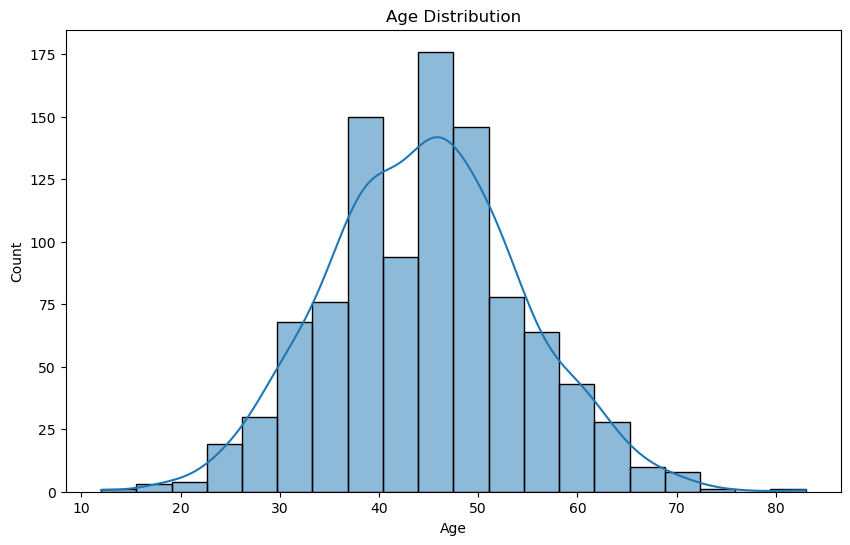

C:\Users\samvj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


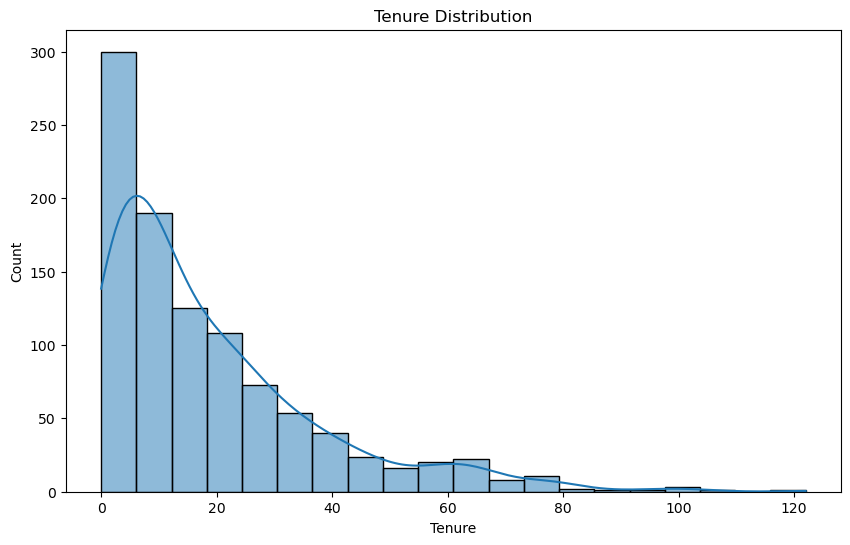

C:\Users\samvj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


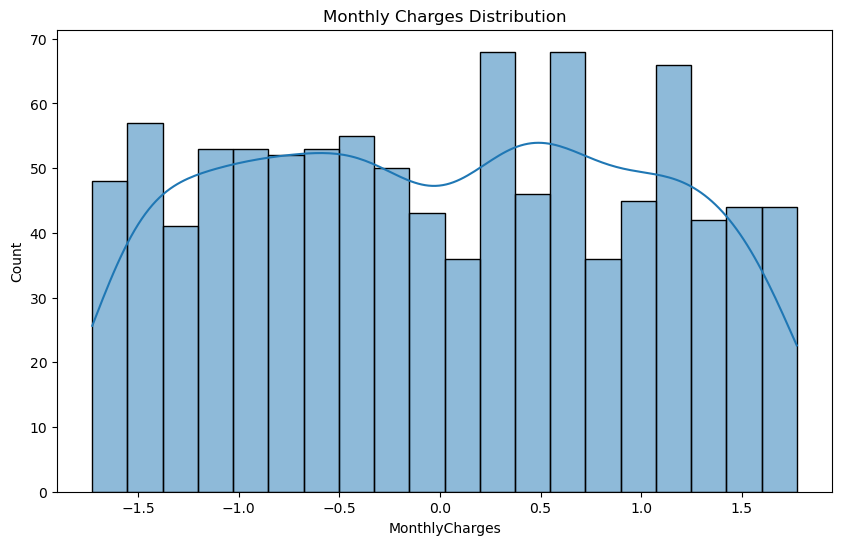

AttributeError: 'numpy.int64' object has no attribute 'startswith'

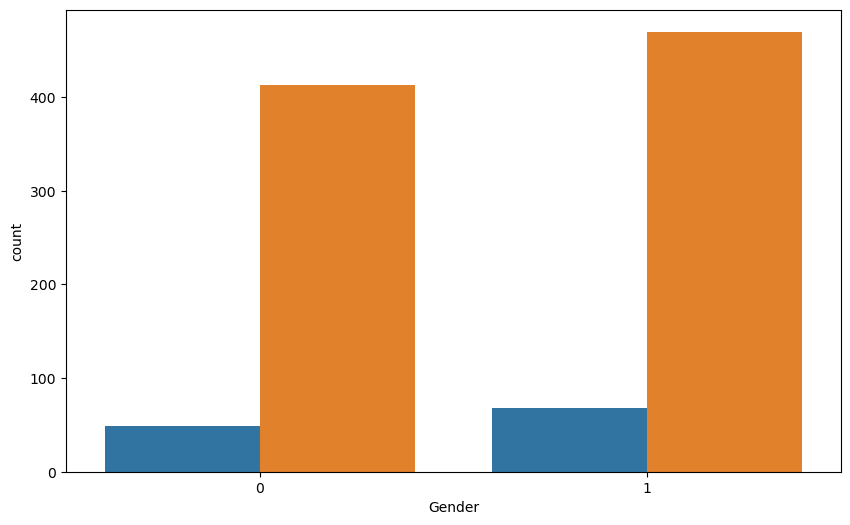

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of Key Features
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], kde=True, bins=20)
plt.title('Tenure Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], kde=True, bins=20)
plt.title('Monthly Charges Distribution')
plt.show()

# 2. Categorical Variables and Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn by Tech Support')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ContractType_One-Year', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

# 3. Churn Distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()


In [47]:
df['Gender'] = df['Gender'].astype(str)
df['Churn'] = df['Churn'].astype(str)  # Make sure Churn is categorical (string)


C:\Users\samvj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


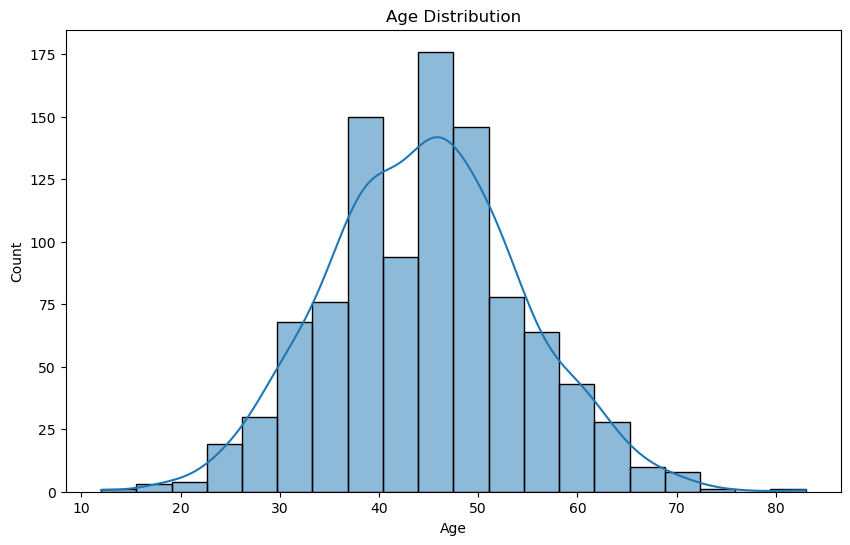

C:\Users\samvj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


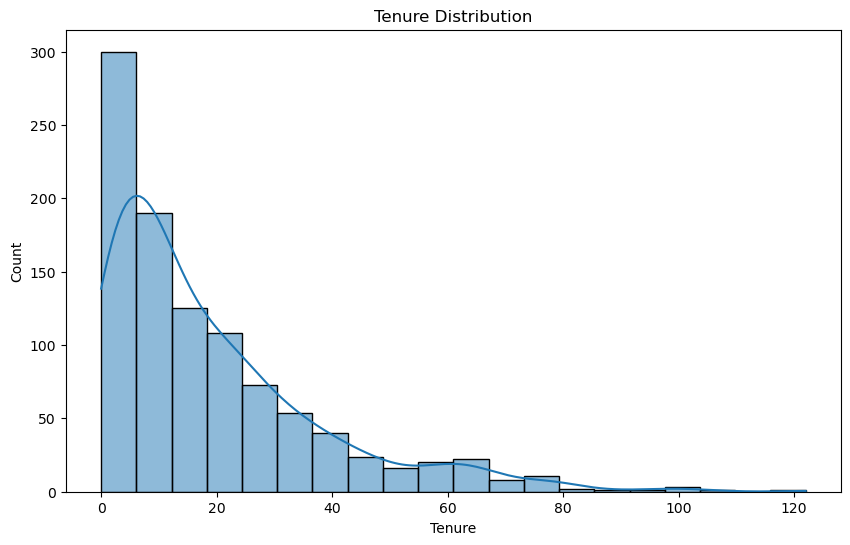

C:\Users\samvj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


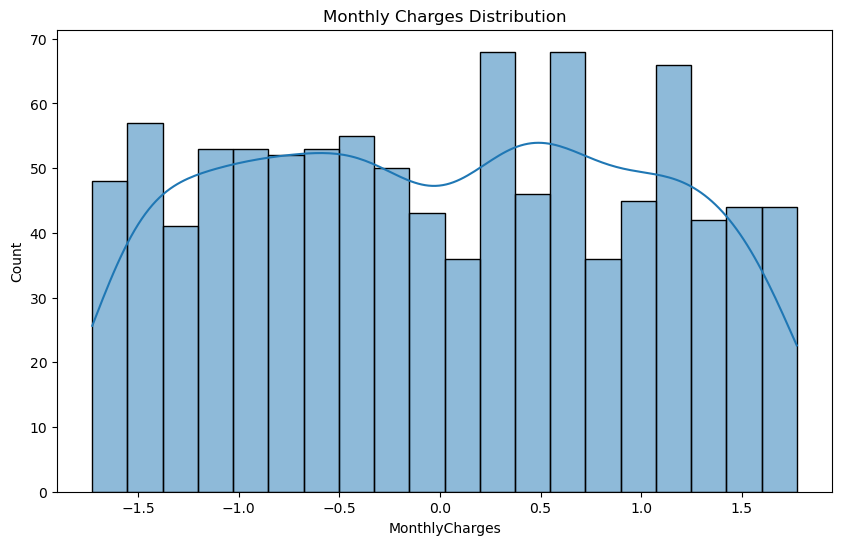

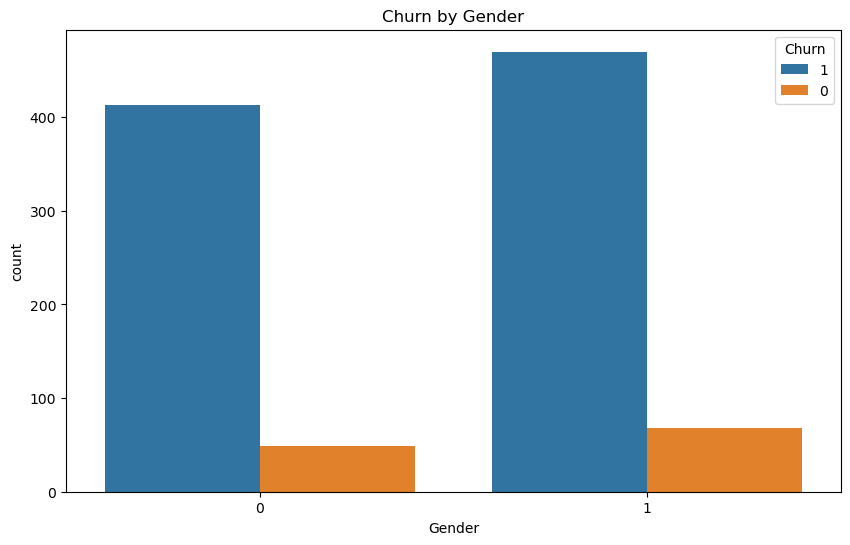

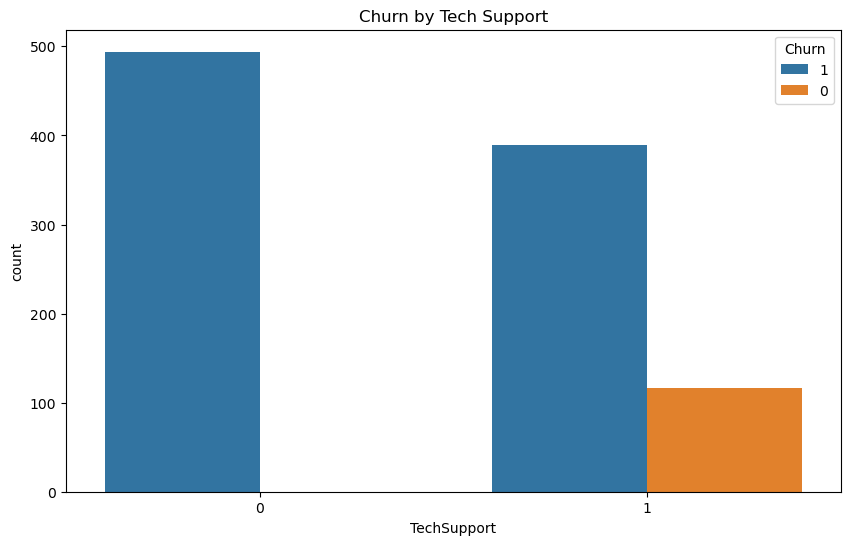

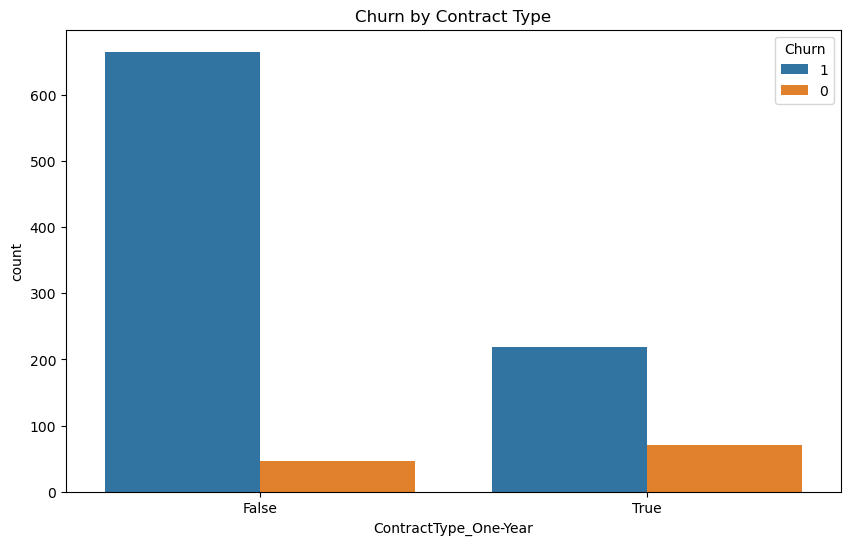

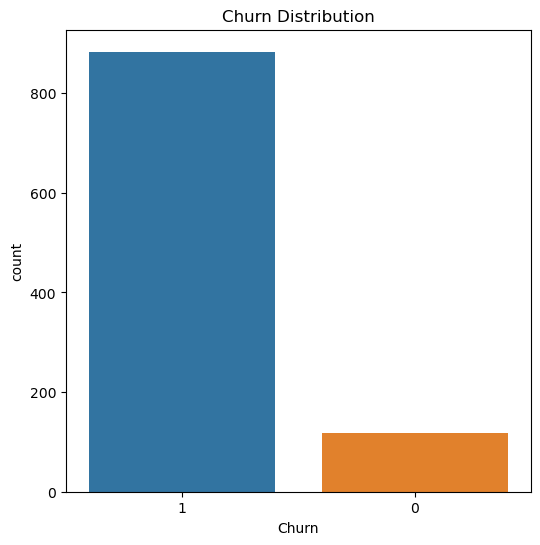

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of Key Features
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], kde=True, bins=20)
plt.title('Tenure Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], kde=True, bins=20)
plt.title('Monthly Charges Distribution')
plt.show()

# 2. Categorical Variables and Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn by Tech Support')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ContractType_One-Year', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

# 3. Churn Distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()


In [50]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['CustomerID', 'Churn'])  # Drop irrelevant and target columns
y = df['Churn'].astype(int)  # Ensure target is numeric

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


C:\Users\samvj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.95      0.99      0.97       177

    accuracy                           0.94       200
   macro avg       0.91      0.78      0.83       200
weighted avg       0.94      0.94      0.93       200

Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.99      1.00       177

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00  

In [52]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the average accuracy across folds
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.9960000000000001


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100],  # Reduced to one option
    'max_depth': [None, 10],
    'min_samples_split': [2],  # Reduced to one option
    'min_samples_leaf': [1]    # Reduced to one option
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)  # Set a random state for reproducibility

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=3,                       # 5-fold cross-validation
    scoring='accuracy',         # Evaluate by accuracy
    n_jobs=-1,                  # Use all available processors to speed up the search
    verbose=2                   # Set verbosity level for insight into progress
)
# Fit the grid search model to the training data
print("Starting GridSearchCV fitting...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting completed.")

# Extract the best parameters and the best model score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance on the test set
print("Tuned Random Forest Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Starting GridSearchCV fitting...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
GridSearchCV fitting completed.
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9912562304638
Tuned Random Forest Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Cross-Validation Scores: [0.99  1.    1.    0.995 1.   ]
Average Cross-Validation Score: 0.9970000000000001


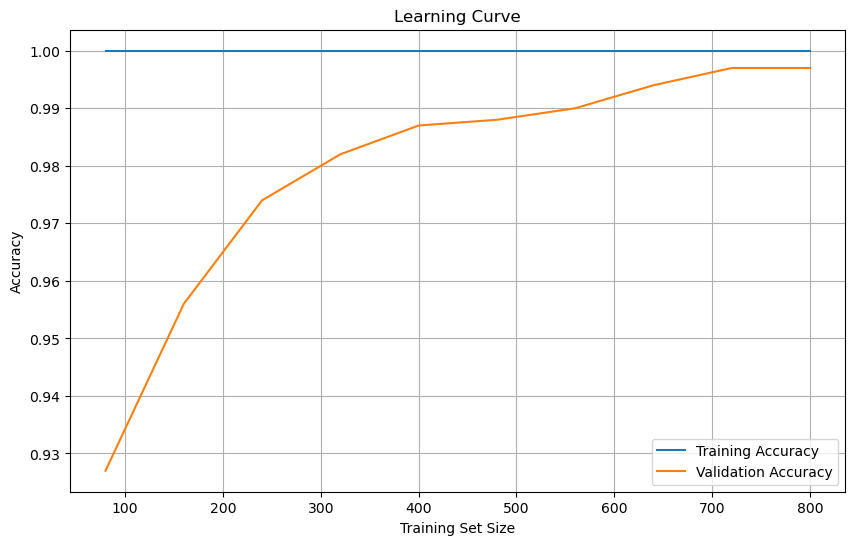

In [63]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


Feature Importance:
                       Feature  Importance
2                       Tenure    0.183654
6        ContractType_One-Year    0.167347
5                  TechSupport    0.166797
7        ContractType_Two-Year    0.145151
3               MonthlyCharges    0.138776
4                 TotalCharges    0.107070
0                          Age    0.041869
9         InternetService_None    0.025855
8  InternetService_Fiber Optic    0.014305
1                       Gender    0.009175


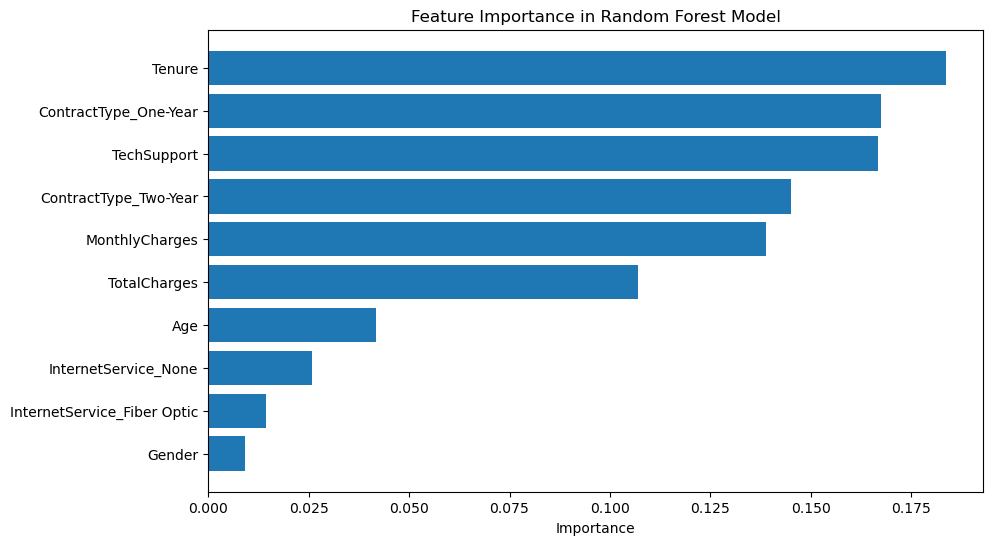

In [64]:
importances = best_rf_model.feature_importances_
feature_names = X.columns  # Assuming `X` is a DataFrame

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


In [65]:
# Expanded GridSearchCV for further tuning
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 15],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=3, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=2
)
grid_search.fit(X_train, y_train)

print("Best Parameters After Further Tuning:", grid_search.best_params_)
print("Best Cross-Validation Score After Tuning:", grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\samvj\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters After Further Tuning: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score After Tuning: 0.9925046699144865


In [66]:
import joblib

# Save the best model for future use
joblib.dump(best_rf_model, 'best_rf_model.pkl')
print("Model saved as 'best_rf_model.pkl'")


Model saved as 'best_rf_model.pkl'


In [67]:
# Final report summary
print("\n--- Final Model Report ---")
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")
print(f"Test Accuracy with Best Model: {accuracy_score(y_test, y_pred):.2f}\n")
print("Feature Importance Analysis:")
print(feature_importance_df)



--- Final Model Report ---
Cross-Validation Accuracy: 1.00
Test Accuracy with Best Model: 1.00

Feature Importance Analysis:
                       Feature  Importance
2                       Tenure    0.183654
6        ContractType_One-Year    0.167347
5                  TechSupport    0.166797
7        ContractType_Two-Year    0.145151
3               MonthlyCharges    0.138776
4                 TotalCharges    0.107070
0                          Age    0.041869
9         InternetService_None    0.025855
8  InternetService_Fiber Optic    0.014305
1                       Gender    0.009175
